CLASSIFICAZIONE BINARIA

In [1]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/heart.csv

--2022-04-14 14:17:28--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/heart.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.138
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/csv]
Saving to: ‘heart.csv.1’

heart.csv.1         100%[===================>]  11.06K  --.-KB/s    in 0s      

2022-04-14 14:17:29 (73.6 MB/s) - ‘heart.csv.1’ saved [11328/11328]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df['target'].value_counts()

In [ ]:
df.groupby('target').mean()

1 --> NO

0 --> YES

In [ ]:
# number of values for each target_values
sns.catplot(x='target', data = df, kind = 'count')

In [ ]:
# sex vs target (heart_disease)
plt.figure(figsize=(5,5))

sns.countplot(x='sex',hue='target',data=df)

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), fmt = '.1f', annot = True)


In [ ]:
sns.pairplot(df,hue='target');

#SEPARARE LA TARGET DALLE FEATURES

In [4]:
X = df.drop('target',axis=1)
y=df['target']

## STANDARDIZZAZIONE

In [5]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X)
X_ = standardized_data
X_

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [6]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

# TRAIN / TEST SPLIT

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, 
                                                    test_size=0.2,
                                                    random_state=667
                                                    )

In [8]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


#MODEL TRAINING

RANDOM FOREST CLASSIFIER

>1, train: 0.831, test: 0.836
>2, train: 0.860, test: 0.852
>3, train: 0.888, test: 0.803
>4, train: 0.926, test: 0.836
>5, train: 0.959, test: 0.803
>6, train: 0.983, test: 0.820
>7, train: 1.000, test: 0.803
>8, train: 1.000, test: 0.803
>9, train: 1.000, test: 0.803
>10, train: 1.000, test: 0.803
>11, train: 1.000, test: 0.803
>12, train: 1.000, test: 0.803
>13, train: 1.000, test: 0.803
>14, train: 1.000, test: 0.803
>15, train: 1.000, test: 0.803
>16, train: 1.000, test: 0.803
>17, train: 1.000, test: 0.803
>18, train: 1.000, test: 0.803
>19, train: 1.000, test: 0.803
>20, train: 1.000, test: 0.803


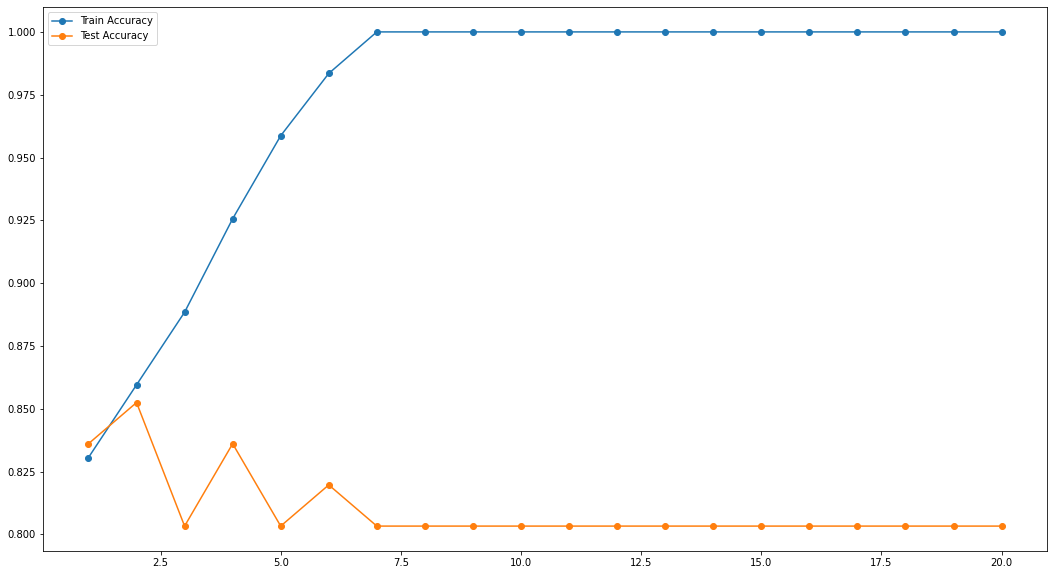

In [9]:
from sklearn.ensemble import RandomForestClassifier

train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

max_depth = 4

In [10]:
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=4)

Fit del modello

In [11]:
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=667)

#FEATURE IMPORTANCE

Text(0.5, 0, 'Relative Importance')

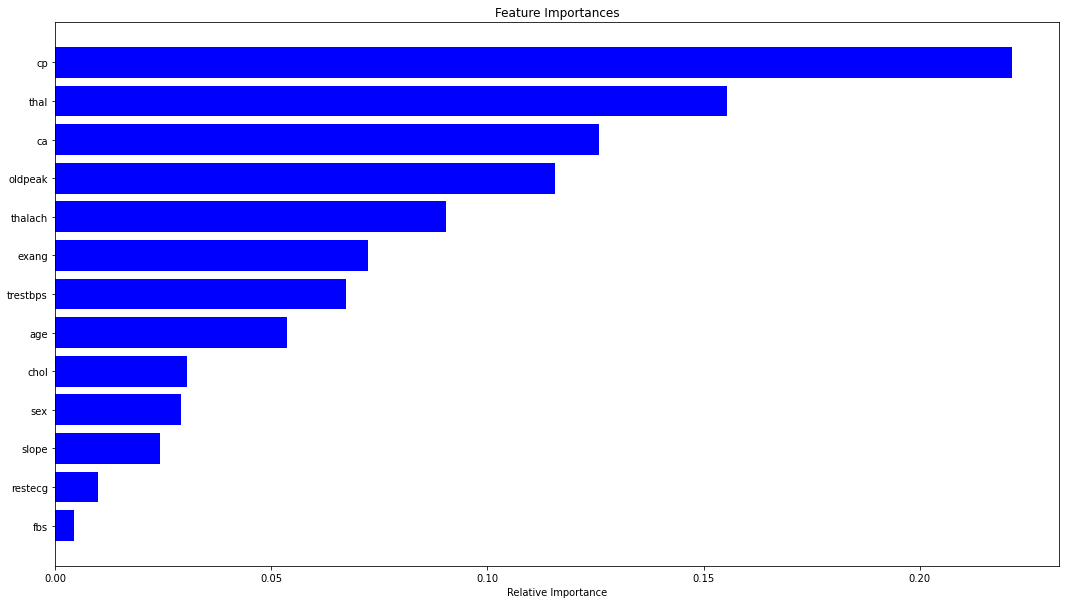

In [12]:
#Feature importance for Random Forest
features = X.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

#ACCURACY SCORE

In [13]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8360655737704918


0 --> YES

1 --> NO

In [14]:
labels = ['Heart Disease', 'NO Heart Disease']

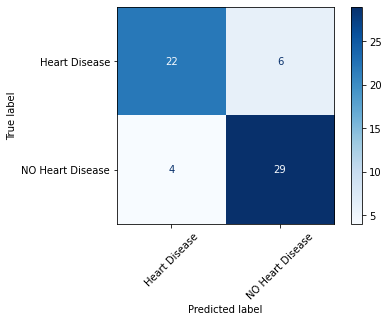

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [16]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

                  precision    recall  f1-score   support

   Heart Disease       0.85      0.79      0.81        28
NO Heart Disease       0.83      0.88      0.85        33

        accuracy                           0.84        61
       macro avg       0.84      0.83      0.83        61
    weighted avg       0.84      0.84      0.84        61



#ROC Curves

In [17]:
!pip install plot-metric --quiet

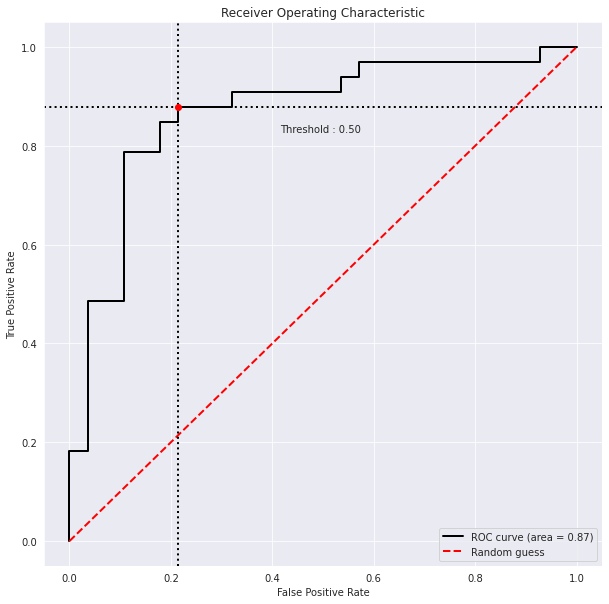

In [18]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

In [19]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.867965367965368


#P-R Curves

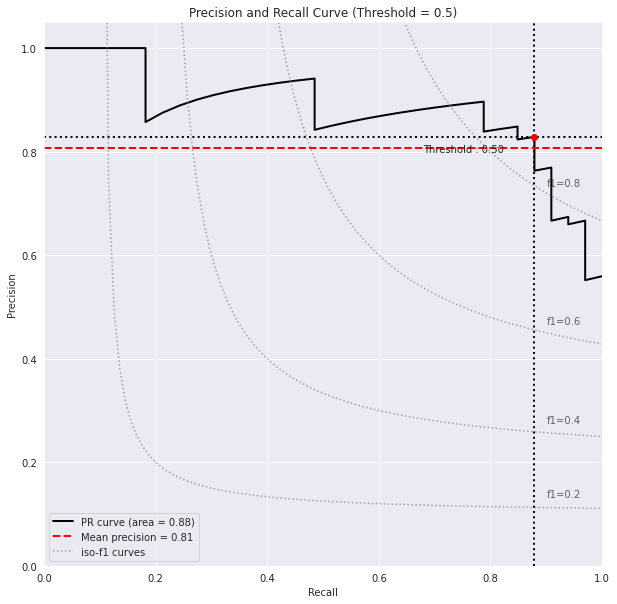

In [20]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

#Building a Predictive System

In [ ]:
df.head()

In [21]:
input_data = (63,0,2,120,354,1,1,150,0,2.3,0,2,1)

# changing the input data to a numpy array
input_np = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_np.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction[0])

if (prediction[0]==1):
  print('NO Heart Disease')
else:
  print('Heart Disease')

0
Heart Disease


# NUMERO DI FEATURES
Check the Pipeline performance with feature selection

In [22]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

featu=[]
for i in range(2,len(X.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=4)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    y_pred_proba = pipe.predict_proba(X_test)[::,1]
    roc_auc = roc_auc_score(y_test,y_pred_proba)
    featu.append(roc_auc)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, AUC: %.3f' % (i, test_acc, roc_auc ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))

feature selected 2, Acc.Test: 0.656, AUC: 0.744
feature selected 3, Acc.Test: 0.656, AUC: 0.762
feature selected 4, Acc.Test: 0.623, AUC: 0.755
feature selected 5, Acc.Test: 0.656, AUC: 0.756
feature selected 6, Acc.Test: 0.705, AUC: 0.763
feature selected 7, Acc.Test: 0.754, AUC: 0.830
feature selected 8, Acc.Test: 0.738, AUC: 0.843
feature selected 9, Acc.Test: 0.754, AUC: 0.864
feature selected 10, Acc.Test: 0.803, AUC: 0.870
feature selected 11, Acc.Test: 0.787, AUC: 0.854
feature selected 12, Acc.Test: 0.787, AUC: 0.871

 Best number of feature selection is: 12


 Best number of feature selection is: 12


#Pipeline
Always give not normalize data to train the Pipeline!

In [24]:
# X = features not standardized
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state=667
                                                    )

In [25]:
standardize = StandardScaler()
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=12)
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=4)

pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=12)),
                ('classifier',
                 RandomForestClassifier(max_depth=4, random_state=667))])

In [26]:
input_data = (63,0,2,120,354,1,1,150,0,2.3,0,2,1)

prediction = pipe.predict([input_data])
print(prediction[0])

if (y_pred[0] == 0):
  print('Heart Disease')
else:
  print('NO Heart Disease')

0
Heart Disease


In [27]:
import joblib
joblib.dump(pipe,'pipe_wine.pkl')

['pipe_wine.pkl']

In [28]:
uploaded_model = joblib.load('pipe_wine.pkl')

uploaded_model.predict([input_data])[0] #0 means Heart Disease

0